# AgroDataThon Perfect Crop

### Carga de Librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
import gdown

In [5]:
# Lista de enlaces a los CSV
links = [
    "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agr_mun_2023.csv",
    "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agr_mun_2022.csv",
    "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agr_mun_2021.csv"
]

# Lista para almacenar los DataFrames
df_list1 = []

# Cargar los CSV del primer grupo en DataFrames y agregarlos a la lista
for link in links:
    df = pd.read_csv(link, encoding='latin1')
    df_list1.append(df)


# Concatenar los DataFrames del primer grupo
df1 = pd.concat(df_list1, ignore_index=True)

print(df1.dtypes)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [ ]:

# Lista de enlaces a los CSV para el segundo grupo
links2 = [
    "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2020.csv",
    "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2019.csv",
    "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2018.csv",
    "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2017.csv",
    "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2016.csv",
    "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2015.csv"
]

df_list2 = []

# Cargar los CSV del segundo grupo en DataFrames y agregarlos a la lista
for link2 in links2:
    df = pd.read_csv(link2, encoding='latin1')
    df_list2.append(df)

# Concatenar los DataFrames del segundo grupo
df2 = pd.concat(df_list2, ignore_index=True)

print(df2.dtypes)



Anio                    int64
Idestado                int64
Nomestado              object
Idddr                   int64
Nomddr                 object
Idcader                 int64
Nomcader               object
Idmunicipio             int64
Nommunicipio           object
Idciclo                 int64
Nomcicloproductivo     object
Idmodalidad             int64
Nommodalidad           object
Idunidadmedida          int64
Nomunidad              object
Idcultivo               int64
Nomcultivo Sin Um      object
Sembrada              float64
Cosechada             float64
Siniestrada           float64
Volumenproduccion     float64
Rendimiento           float64
Precio                float64
Valorproduccion       float64
dtype: object


In [ ]:
# 1. Renombrar el campo 'Nomcultivo Sin Um' a 'Nomcultivo' en el segundo dataset
df2.rename(columns={'Nomcultivo Sin Um': 'Nomcultivo'}, inplace=True)

# 2. Convertir 'Sembrada' en el primer dataset de 'object' a 'float64'
df1['Sembrada'] = pd.to_numeric(df1['Sembrada'], errors='coerce')

# 3. Convertir 'Volumenproduccion' en el primer dataset de 'object' a 'float64'
df1['Volumenproduccion'] = pd.to_numeric(df1['Volumenproduccion'], errors='coerce')

# 4. Renombrar el campo 'Precio' a 'Preciomediorural' en el segundo dataset
df2.rename(columns={'Precio': 'Preciomediorural'}, inplace=True)

# Verificar si los DataFrames ahora tienen las mismas columnas
if df1.columns.equals(df2.columns):
    # Concatenar los DataFrames
    df_concatenado = pd.concat([df1, df2], ignore_index=True)
    print("DataFrames concatenados con éxito.")
else:
    print("Los DataFrames todavía tienen diferencias en los nombres de las columnas.")

# Mostrar los nombres de los campos y el tipo de dato de cada columna
print("Nombres de los campos y sus tipos de datos después de concatenar:")
print(df_concatenado.dtypes)

DataFrames concatenados con éxito.
Nombres de los campos y sus tipos de datos después de concatenar:
Anio                    int64
Idestado                int64
Nomestado              object
Idddr                   int64
Nomddr                 object
Idcader                 int64
Nomcader               object
Idmunicipio             int64
Nommunicipio           object
Idciclo                 int64
Nomcicloproductivo     object
Idmodalidad             int64
Nommodalidad           object
Idunidadmedida          int64
Nomunidad              object
Idcultivo               int64
Nomcultivo             object
Sembrada              float64
Cosechada             float64
Siniestrada           float64
Volumenproduccion     float64
Rendimiento           float64
Preciomediorural      float64
Valorproduccion       float64
dtype: object


## Ahora a Concatenar el 3er Dataset

Ahora crearemos una funcion que lea el archivo y cheque la codificacion del csv

In [ ]:
# Función para cargar y mostrar información del dataset
def load_and_print_info(url):
    try:
        # Intentar cargar el dataset con codificación UTF-8
        df = pd.read_csv(url, encoding='utf-8')
    except UnicodeDecodeError:
        # Si falla, intentar con codificación ISO-8859-1
        df = pd.read_csv(url, encoding='ISO-8859-1')

    # Imprimir los campos y sus tipos
    print(f"Información del dataset: {url}")
    print(df.dtypes)
    print("\n")

    return df


In [ ]:

# Cargar y mostrar información de cada URL independientemente
url_2014 = "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2014.csv"
df_2014 = load_and_print_info(url_2014)

df_2014.head()



Información del dataset: http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2014.csv
Anio                    int64
Idestado                int64
Nomestado              object
Idddr                   int64
Nomddr                 object
Idcader                 int64
Nomcader               object
Idmunicipio             int64
Nommunicipio           object
Idciclo                 int64
Nomcicloproductivo     object
Idmodalidad             int64
Nommodalidad           object
Idunidadmedida          int64
Nomunidad              object
Idcultivo               int64
Nomcultivo             object
Sembrada              float64
Cosechada             float64
Siniestrada           float64
Volumenproduccion     float64
Rendimiento           float64
Precio                float64
Valorproduccion       float64
dtype: object




,Anio,Idestado,Nomestado,Idddr,Nomddr,Idcader,Nomcader,Idmunicipio,Nommunicipio,Idciclo,...,Nomunidad,Idcultivo,Nomcultivo,Sembrada,Cosechada,Siniestrada,Volumenproduccion,Rendimiento,Precio,Valorproduccion
0,2014,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,5490000,Avena forrajera en verde,813.0,813.0,0.0,21850.10,26.88,452.78,9893288.28
1,2014,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,5900000,Cebada forrajera en verde,38.0,38.0,0.0,1064.00,28.00,450.00,478800.00
2,2014,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,9090000,Triticale forrajero en verde,829.0,829.0,0.0,27481.35,33.15,556.71,15299142.36
3,2014,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,15050000,Pastos y praderas,623.0,623.0,0.0,31665.10,50.83,543.12,17197949.11
4,2014,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,2,...,Tonelada,5490000,Avena forrajera en verde,26.0,26.0,0.0,673.00,25.88,471.58,317373.34


In [ ]:
url_2012 = "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2012.csv"
load_and_print_info(url_2012)



Información del dataset: http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2012.csv
Anio                    int64
Idestado                int64
Nomestado              object
Idddr                   int64
Nomddr                 object
Idcader                 int64
Nomcader               object
Idmunicipio             int64
Nommunicipio           object
Idciclo                 int64
Nomcicloproductivo     object
Idmodalidad             int64
Nommodalidad           object
Idunidadmedida          int64
Nomunidad              object
Idcultivo               int64
Nomcultivo             object
Sembrada              float64
Cosechada             float64
Siniestrada           float64
Volumenproduccion     float64
Rendimiento           float64
Precio                float64
Valorproduccion       float64
dtype: object




,Anio,Idestado,Nomestado,Idddr,Nomddr,Idcader,Nomcader,Idmunicipio,Nommunicipio,Idciclo,...,Nomunidad,Idcultivo,Nomcultivo,Sembrada,Cosechada,Siniestrada,Volumenproduccion,Rendimiento,Precio,Valorproduccion
0,2012,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,5070000,Ajo,9.0,9.0,0.0,73.80,8.20,9200.00,678960.00
1,2012,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,5490000,Avena forrajera en verde,1105.0,1105.0,0.0,29306.00,26.52,698.75,20477567.50
2,2012,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,5900000,Cebada forrajera en verde,93.0,93.0,0.0,2408.00,25.89,702.12,1690704.96
3,2012,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,9090000,Triticale forrajero en verde,1030.0,1030.0,0.0,34384.49,33.38,737.23,25349277.56
4,2012,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,15050000,Pastos y praderas,761.0,761.0,0.0,39582.00,52.01,745.42,29505214.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36258,2012,32,Zacatecas,190,Jalpa,4,Jalpa,19,Jalpa,3,...,Tonelada,7960000,Nuez,16.0,16.0,0.0,20.80,1.30,23300.00,484640.00
36259,2012,32,Zacatecas,190,Jalpa,4,Jalpa,19,Jalpa,3,...,Tonelada,9120000,Tuna,60.0,60.0,0.0,810.00,13.50,4700.00,3807000.00
36260,2012,32,Zacatecas,190,Jalpa,4,Jalpa,19,Jalpa,3,...,Tonelada,15050000,Pastos y praderas,110.0,110.0,0.0,7530.00,68.45,558.78,4207650.00
36261,2012,32,Zacatecas,190,Jalpa,4,Jalpa,19,Jalpa,3,...,Tonelada,5050000,Agave,220.5,44.0,0.0,4048.00,92.00,855.00,3461040.00


In [ ]:
url_2013 = "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2013.csv"
df_2013 = load_and_print_info(url_2013)

Información del dataset: http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2013.csv
Anio                    int64
Idestado                int64
Nomestado              object
Idddr                   int64
Nomddr                 object
Idcader                 int64
Nomcader               object
Idmunicipio             int64
Nommunicipio           object
Idciclo                 int64
Nomcicloproductivo     object
Idmodalidad             int64
Nommodalidad           object
Idunidadmedida          int64
Nomunidad              object
Idcultivo               int64
Nomcultivo             object
Sembrada              float64
Cosechada             float64
Siniestrada           float64
Volumenproduccion     float64
Rendimiento           float64
Precio                float64
Valorproduccion       float64
dtype: object




In [ ]:
url_2012 = "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2012.csv"
df_2012 = load_and_print_info(url_2012)

Información del dataset: http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2012.csv
Anio                    int64
Idestado                int64
Nomestado              object
Idddr                   int64
Nomddr                 object
Idcader                 int64
Nomcader               object
Idmunicipio             int64
Nommunicipio           object
Idciclo                 int64
Nomcicloproductivo     object
Idmodalidad             int64
Nommodalidad           object
Idunidadmedida          int64
Nomunidad              object
Idcultivo               int64
Nomcultivo             object
Sembrada              float64
Cosechada             float64
Siniestrada           float64
Volumenproduccion     float64
Rendimiento           float64
Precio                float64
Valorproduccion       float64
dtype: object




In [ ]:
url_2011 = "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2011.csv"
df_2011 = load_and_print_info(url_2011)

Información del dataset: http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2011.csv
Anio                    int64
Idestado                int64
Nomestado              object
Idddr                   int64
Nomddr                 object
Idcader                 int64
Nomcader               object
Idmunicipio             int64
Nommunicipio           object
Idciclo                 int64
Nomcicloproductivo     object
Idmodalidad             int64
Nommodalidad           object
Idunidadmedida          int64
Nomunidad              object
Idcultivo               int64
Nomcultivo             object
Sembrada              float64
Cosechada             float64
Siniestrada           float64
Volumenproduccion     float64
Rendimiento           float64
Precio                float64
Valorproduccion       float64
dtype: object




In [ ]:
url_2010 = "http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2010.csv"
df_2010 = load_and_print_info(url_2010)

Información del dataset: http://infosiap.siap.gob.mx/gobmx/datosAbiertos/ProduccionAgricola/Cierre_agricola_mun_2010.csv
Anio                    int64
Idestado                int64
Nomestado              object
Idddr                   int64
Nomddr                 object
Idcader                 int64
Nomcader               object
Idmunicipio             int64
Nommunicipio           object
Idciclo                 int64
Nomcicloproductivo     object
Idmodalidad             int64
Nommodalidad           object
Idunidadmedida          int64
Nomunidad              object
Idcultivo               int64
Nomcultivo             object
Sembrada              float64
Cosechada             float64
Siniestrada           float64
Volumenproduccion     float64
Rendimiento           float64
Precio                float64
Valorproduccion       float64
dtype: object




In [ ]:
# Asegurarse de que todos los DataFrames tengan las mismas columnas
for df in [df_2014, df_2013, df_2012, df_2011, df_2010]:
    if 'Nomcultivo Sin Um' in df.columns:
        df.rename(columns={'Nomcultivo Sin Um': 'Nomcultivo'}, inplace=True)
    if 'Precio' in df.columns:
        df.rename(columns={'Precio': 'Preciomediorural'}, inplace=True)
    if 'Sembrada' in df.columns and df['Sembrada'].dtype == 'object':
        df['Sembrada'] = pd.to_numeric(df['Sembrada'], errors='coerce')
    if 'Volumenproduccion' in df.columns and df['Volumenproduccion'].dtype == 'object':
        df['Volumenproduccion'] = pd.to_numeric(df['Volumenproduccion'], errors='coerce')

# Concatenar todos los DataFrames en uno solo
df3 = pd.concat([df_2014, df_2013, df_2012, df_2011, df_2010], join='outer', ignore_index=True)

# Imprimir la información del DataFrame concatenado
print("Información del DataFrame concatenado:")
print(df3.dtypes)
print("\n")
print(df3.head())


Información del DataFrame concatenado:
Anio                    int64
Idestado                int64
Nomestado              object
Idddr                   int64
Nomddr                 object
Idcader                 int64
Nomcader               object
Idmunicipio             int64
Nommunicipio           object
Idciclo                 int64
Nomcicloproductivo     object
Idmodalidad             int64
Nommodalidad           object
Idunidadmedida          int64
Nomunidad              object
Idcultivo               int64
Nomcultivo             object
Sembrada              float64
Cosechada             float64
Siniestrada           float64
Volumenproduccion     float64
Rendimiento           float64
Preciomediorural      float64
Valorproduccion       float64
dtype: object


   Anio  Idestado       Nomestado  Idddr          Nomddr  Idcader  \
0  2014         1  Aguascalientes      1  Aguascalientes        1   
1  2014         1  Aguascalientes      1  Aguascalientes        1   
2  2014         1 

In [ ]:
df_concatenado2 = pd.concat([df_concatenado, df3], ignore_index=True)

In [ ]:
# Filtrar las filas donde la columna 'Nomestado' es 'Jalisco'
df_filtrado = df_concatenado2[df_concatenado2['Nomestado'] == 'Jalisco']

# Filtrar las filas donde la columna 'Nomestado' es 'Jalisco' y el cultivo es 'Aguacate'
df_aguacate_jalisco = df_filtrado[df_filtrado['Nomcultivo'] == 'Aguacate']

# Mostrar las primeras filas del DataFrame filtrado
print("Datos filtrados para el cultivo de Aguacate en Jalisco:")
print(df_aguacate_jalisco.head())

# Mostrar el número de filas después del filtro
print(f"Número total de registros para el cultivo de Aguacate en Jalisco: {len(df_aguacate_jalisco)}")

Datos filtrados para el cultivo de Aguacate en Jalisco:
       Anio  Idestado Nomestado  Idddr   Nomddr  Idcader     Nomcader  \
10214  2023        14   Jalisco     65  Zapopan        1  Palos Altos   
10235  2023        14   Jalisco     65  Zapopan        2     Tesistán   
10260  2023        14   Jalisco     65  Zapopan        2     Tesistán   
10275  2023        14   Jalisco     65  Zapopan        3   Tlajomulco   
10314  2023        14   Jalisco     65  Zapopan        3   Tlajomulco   

       Idmunicipio                  Nommunicipio  Idciclo  ... Nomunidad  \
10214           45           Ixtlahuacán del Río        3  ...  Tonelada   
10235           71  San Cristóbal de La Barranca        3  ...  Tonelada   
10260          120                       Zapopan        3  ...  Tonelada   
10275            2             Acatlán de Juárez        3  ...  Tonelada   
10314           97          Tlajomulco de Zúñiga        3  ...  Tonelada   

       Idcultivo Nomcultivo  Sembrada Cosechada 

<ipython-input-16-c719a6e905be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aguacate_jalisco['Volumenproduccion'] = pd.to_numeric(df_aguacate_jalisco['Volumenproduccion'], errors='coerce')


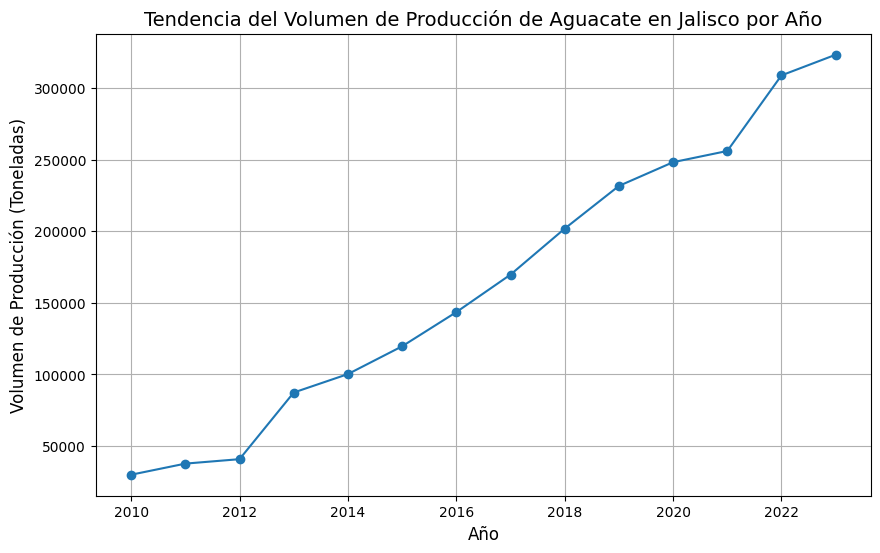

In [ ]:
# Convertir la columna 'Volumenproduccion' a numérico en caso de que haya valores no numéricos
df_aguacate_jalisco['Volumenproduccion'] = pd.to_numeric(df_aguacate_jalisco['Volumenproduccion'], errors='coerce')

# Agrupar por 'Anio' y sumar la columna 'Volumenproduccion'
df_tendencia = df_aguacate_jalisco.groupby('Anio')['Volumenproduccion'].sum()

# Crear la gráfica de tendencia
plt.figure(figsize=(10, 6))
plt.plot(df_tendencia.index, df_tendencia.values, marker='o')

# Añadir títulos y etiquetas
plt.title('Tendencia del Volumen de Producción de Aguacate en Jalisco por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Volumen de Producción (Toneladas)', fontsize=12)

# Mostrar la gráfica
plt.grid(True)
plt.show()

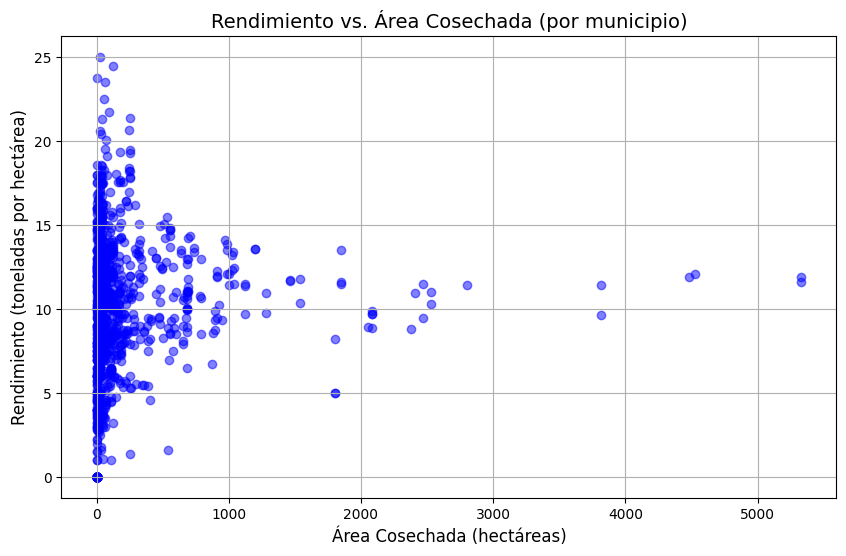

In [ ]:
# Crear la gráfica de dispersión: Rendimiento vs. Área Cosechada (por municipio)
plt.figure(figsize=(10, 6))
plt.scatter(df_aguacate_jalisco['Cosechada'], df_aguacate_jalisco['Rendimiento'], c='blue', alpha=0.5)

# Añadir título y etiquetas
plt.title('Rendimiento vs. Área Cosechada (por municipio)', fontsize=14)
plt.xlabel('Área Cosechada (hectáreas)', fontsize=12)
plt.ylabel('Rendimiento (toneladas por hectárea)', fontsize=12)

# Añadir cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

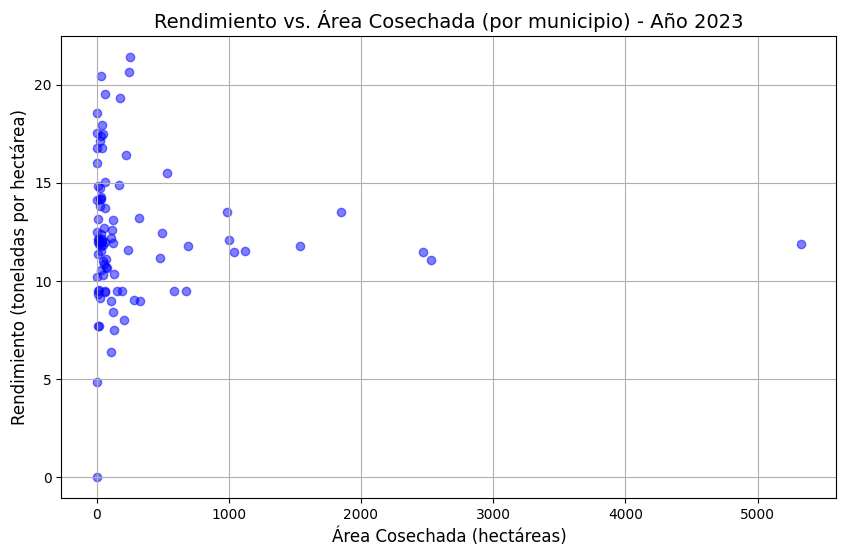

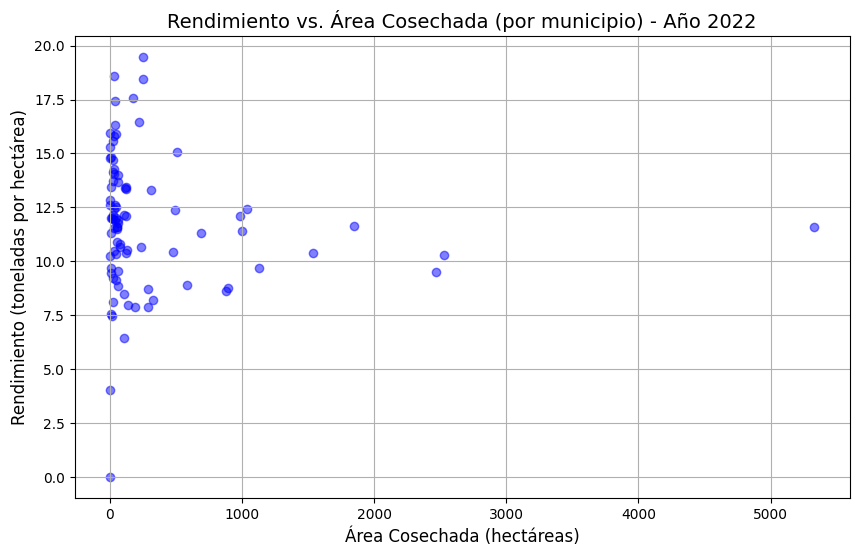

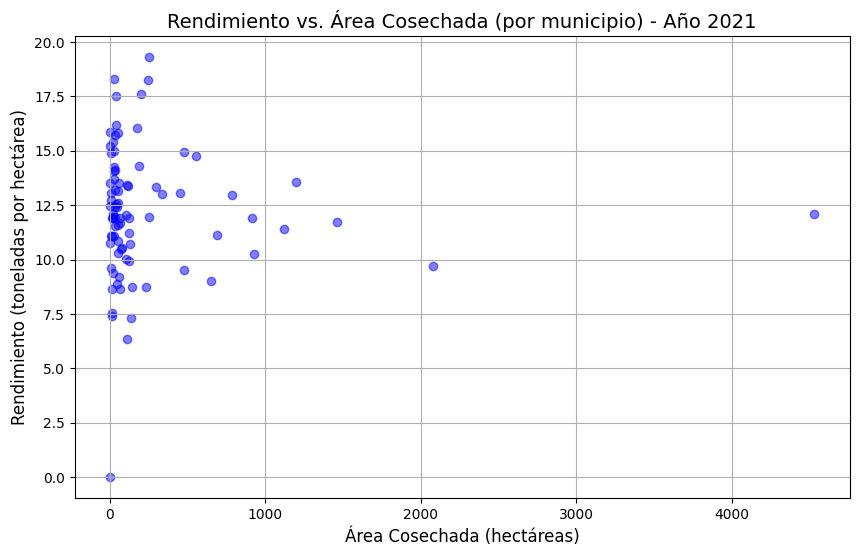

In [ ]:
# Crear las gráficas de dispersión para cada año
years = [2023, 2022, 2021]

for year in years:
    df_year = df_aguacate_jalisco[df_aguacate_jalisco['Anio'] == year]

    plt.figure(figsize=(10, 6))
    plt.scatter(df_year['Cosechada'], df_year['Rendimiento'], c='blue', alpha=0.5)

    # Añadir título y etiquetas
    plt.title(f'Rendimiento vs. Área Cosechada (por municipio) - Año {year}', fontsize=14)
    plt.xlabel('Área Cosechada (hectáreas)', fontsize=12)
    plt.ylabel('Rendimiento (toneladas por hectárea)', fontsize=12)

    # Añadir cuadrícula
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()


In [ ]:
year == '2024'
    # Filtrar los datos para el año actual
df_aguacate_jalisco_year = df_aguacate_jalisco[df_aguacate_jalisco['Anio'] == year]

    # Agrupar los datos por 'Nommunicipio' y sumar el 'Volumenproduccion'
df_grouped = df_aguacate_jalisco_year.groupby('Nommunicipio')['Volumenproduccion'].sum().reset_index()

    # Crear el treemap
fig = px.treemap(df_grouped,
                  path=['Nommunicipio'],
                  values='Volumenproduccion',
                  color='Volumenproduccion',
                  color_continuous_scale='RdBu',
                  title=f'Treemap de Volumen de Producción de Aguacate en Jalisco por Municipio 2024')

    # Mostrar el treemap
fig.show()

<ipython-input-20-42cfc4ad8a22>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



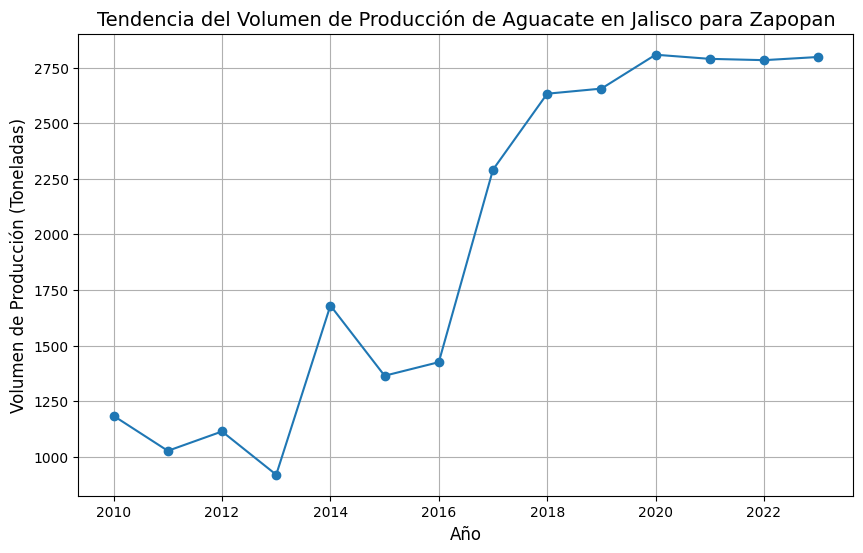

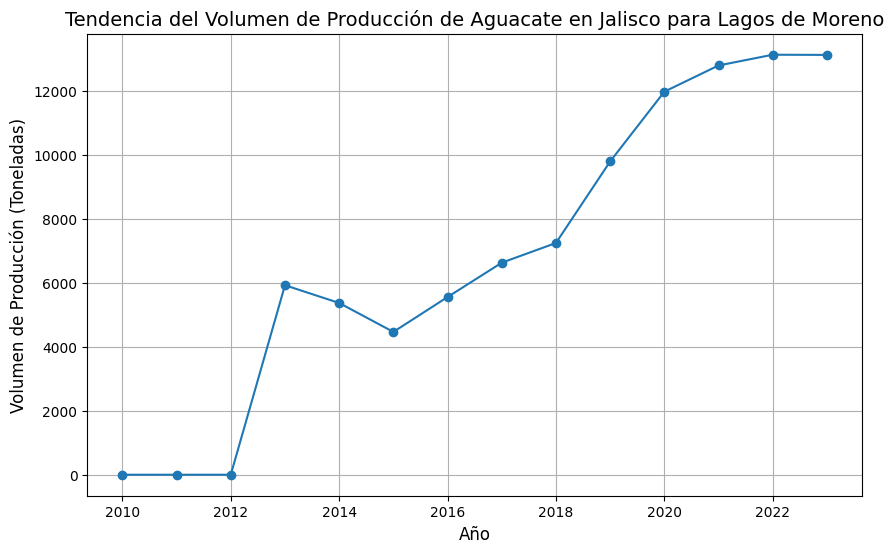

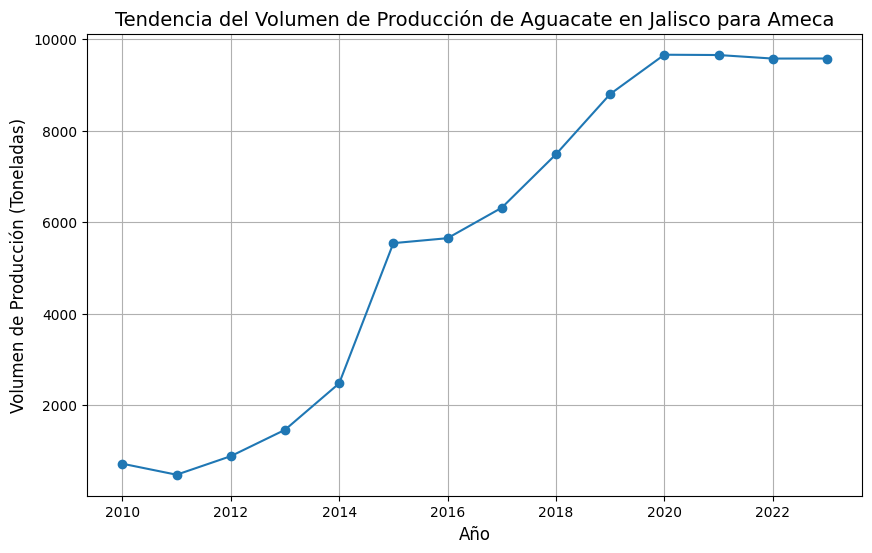

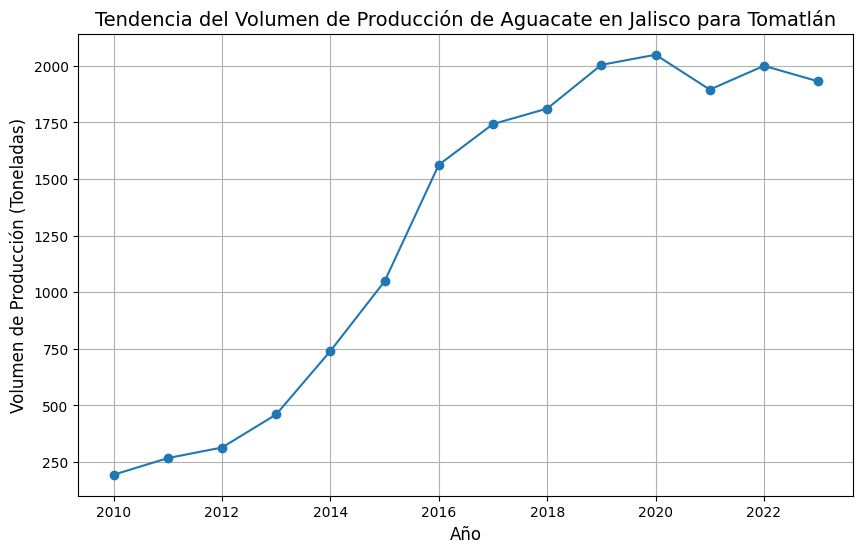

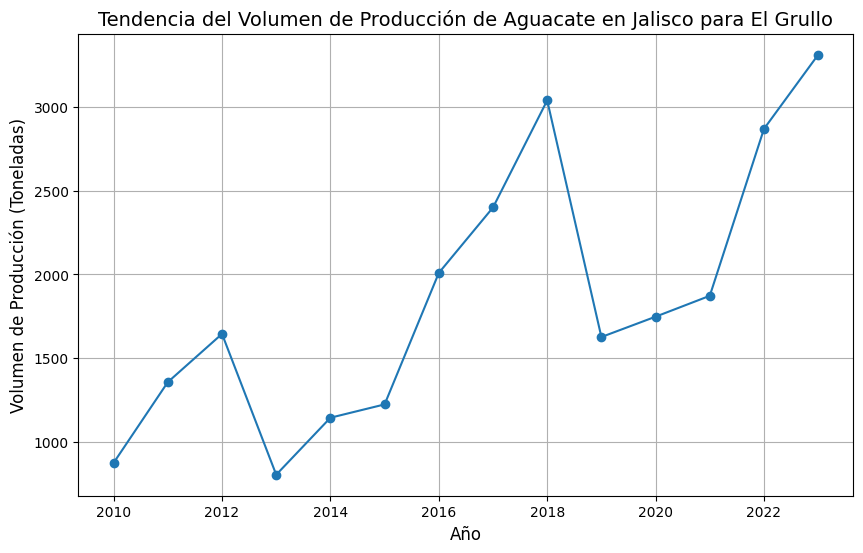

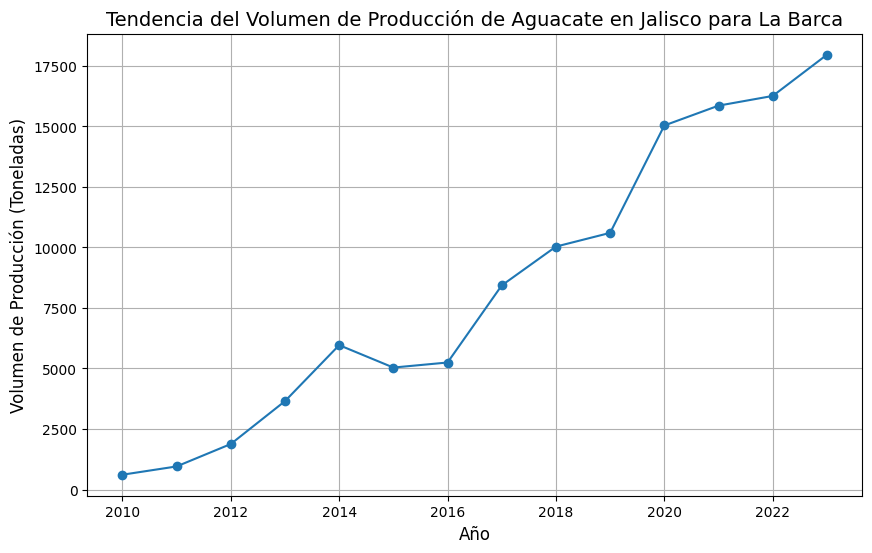

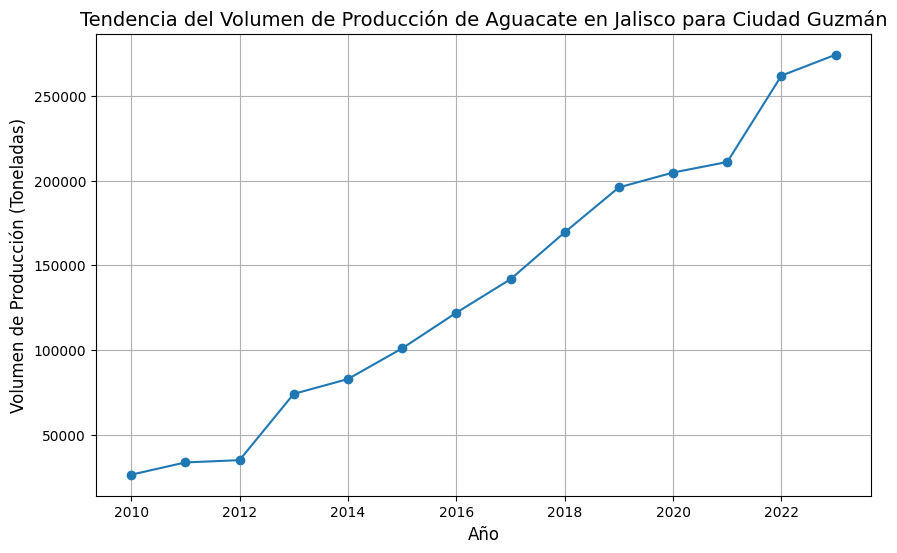

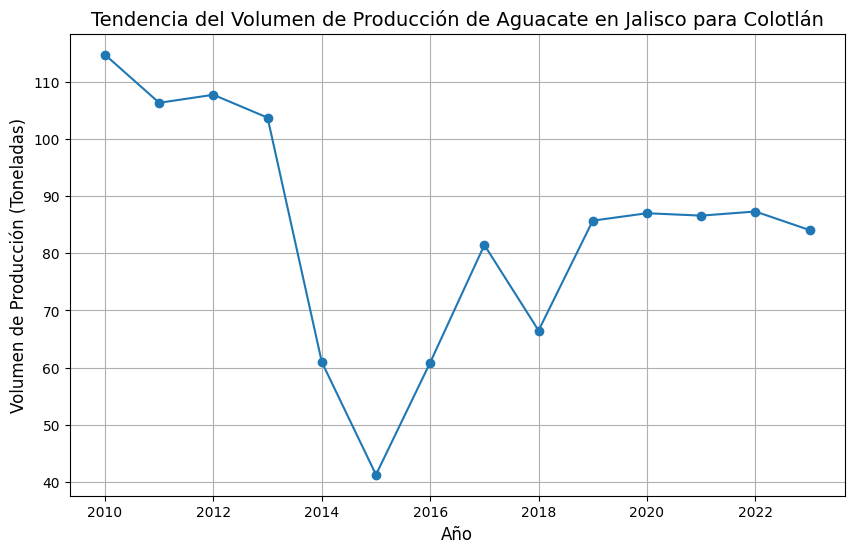

In [ ]:
# Convertir la columna 'Volumenproduccion' a numérico en caso de que haya valores no numéricos
df_aguacate_jalisco['Volumenproduccion'] = pd.to_numeric(df_aguacate_jalisco['Volumenproduccion'], errors='coerce')

# Obtener los valores únicos de 'Nomddr'
nomddr_unicos = df_aguacate_jalisco['Nomddr'].unique()

# Iterar sobre cada valor único de 'Nomddr'
for nomddr in nomddr_unicos:
    # Filtrar los datos para el 'Nomddr' actual
    df_nomddr = df_aguacate_jalisco[df_aguacate_jalisco['Nomddr'] == nomddr]

    # Agrupar por 'Anio' y sumar la columna 'Volumenproduccion'
    df_tendencia = df_nomddr.groupby('Anio')['Volumenproduccion'].sum().reset_index()

    # Crear la gráfica de tendencia
    plt.figure(figsize=(10, 6))
    plt.plot(df_tendencia['Anio'], df_tendencia['Volumenproduccion'], marker='o')

    # Añadir títulos y etiquetas
    plt.title(f'Tendencia del Volumen de Producción de Aguacate en Jalisco para {nomddr}', fontsize=14)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Volumen de Producción (Toneladas)', fontsize=12)

    # Mostrar la gráfica
    plt.grid(True)
    plt.show()


<ipython-input-21-7cbf7927a7db>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



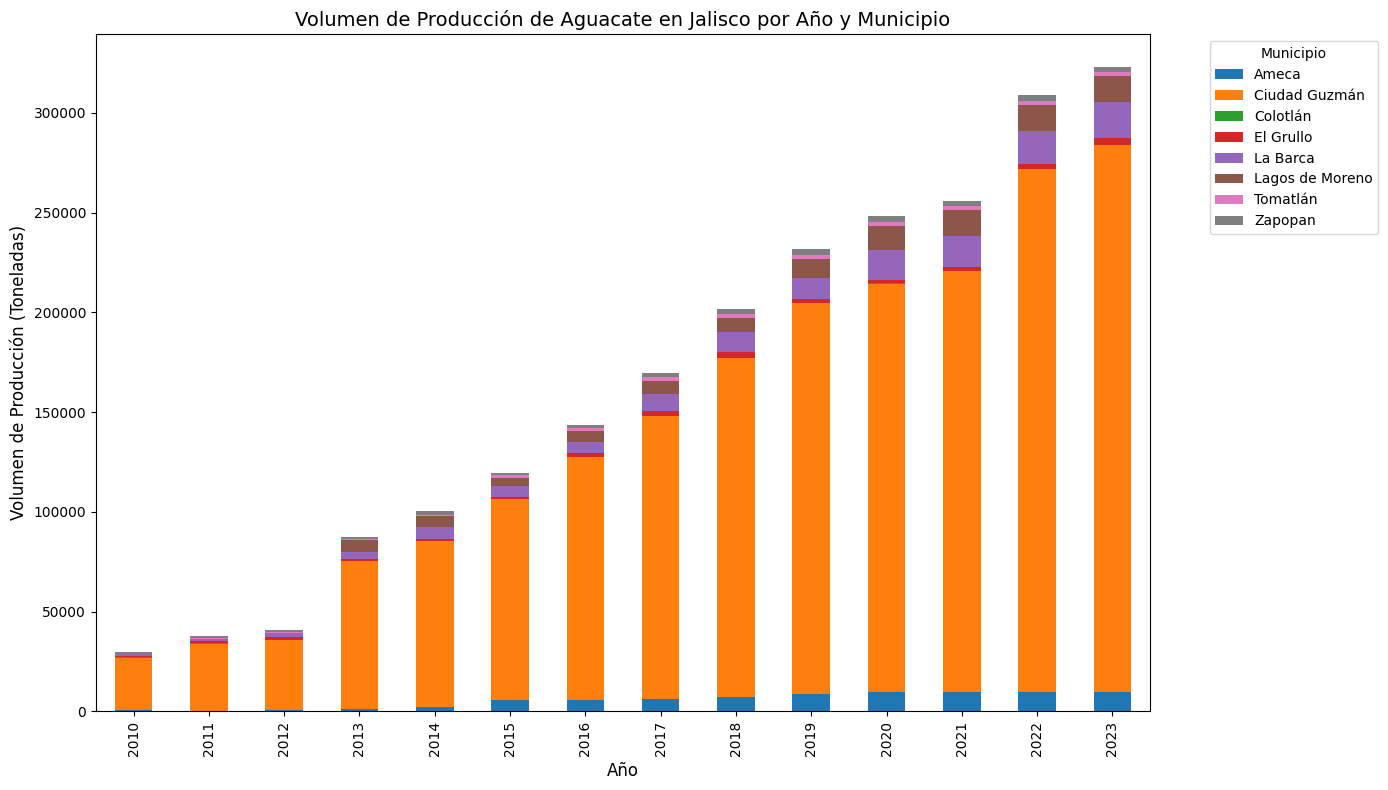

In [ ]:
# Convertir la columna 'Volumenproduccion' a numérico en caso de que haya valores no numéricos
df_aguacate_jalisco['Volumenproduccion'] = pd.to_numeric(df_aguacate_jalisco['Volumenproduccion'], errors='coerce')

# Agrupar los datos por 'Anio' y 'Nomddr' y sumar la columna 'Volumenproduccion'
df_grouped = df_aguacate_jalisco.groupby(['Anio', 'Nomddr'])['Volumenproduccion'].sum().reset_index()

# Crear un DataFrame pivotado para facilitar la creación de la gráfica de barras apiladas
df_pivot = df_grouped.pivot(index='Anio', columns='Nomddr', values='Volumenproduccion').fillna(0)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(14, 8))

# Crear la gráfica de barras apiladas
df_pivot.plot(kind='bar', stacked=True, ax=ax)

# Añadir títulos y etiquetas
ax.set_title('Volumen de Producción de Aguacate en Jalisco por Año y Municipio', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Volumen de Producción (Toneladas)', fontsize=12)

# Añadir una leyenda
ax.legend(title='Municipio', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño para evitar el corte de la leyenda
plt.tight_layout()

# Mostrar la gráfica
plt.show()

<ipython-input-22-e6a1cfa47483>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-e6a1cfa47483>:25: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



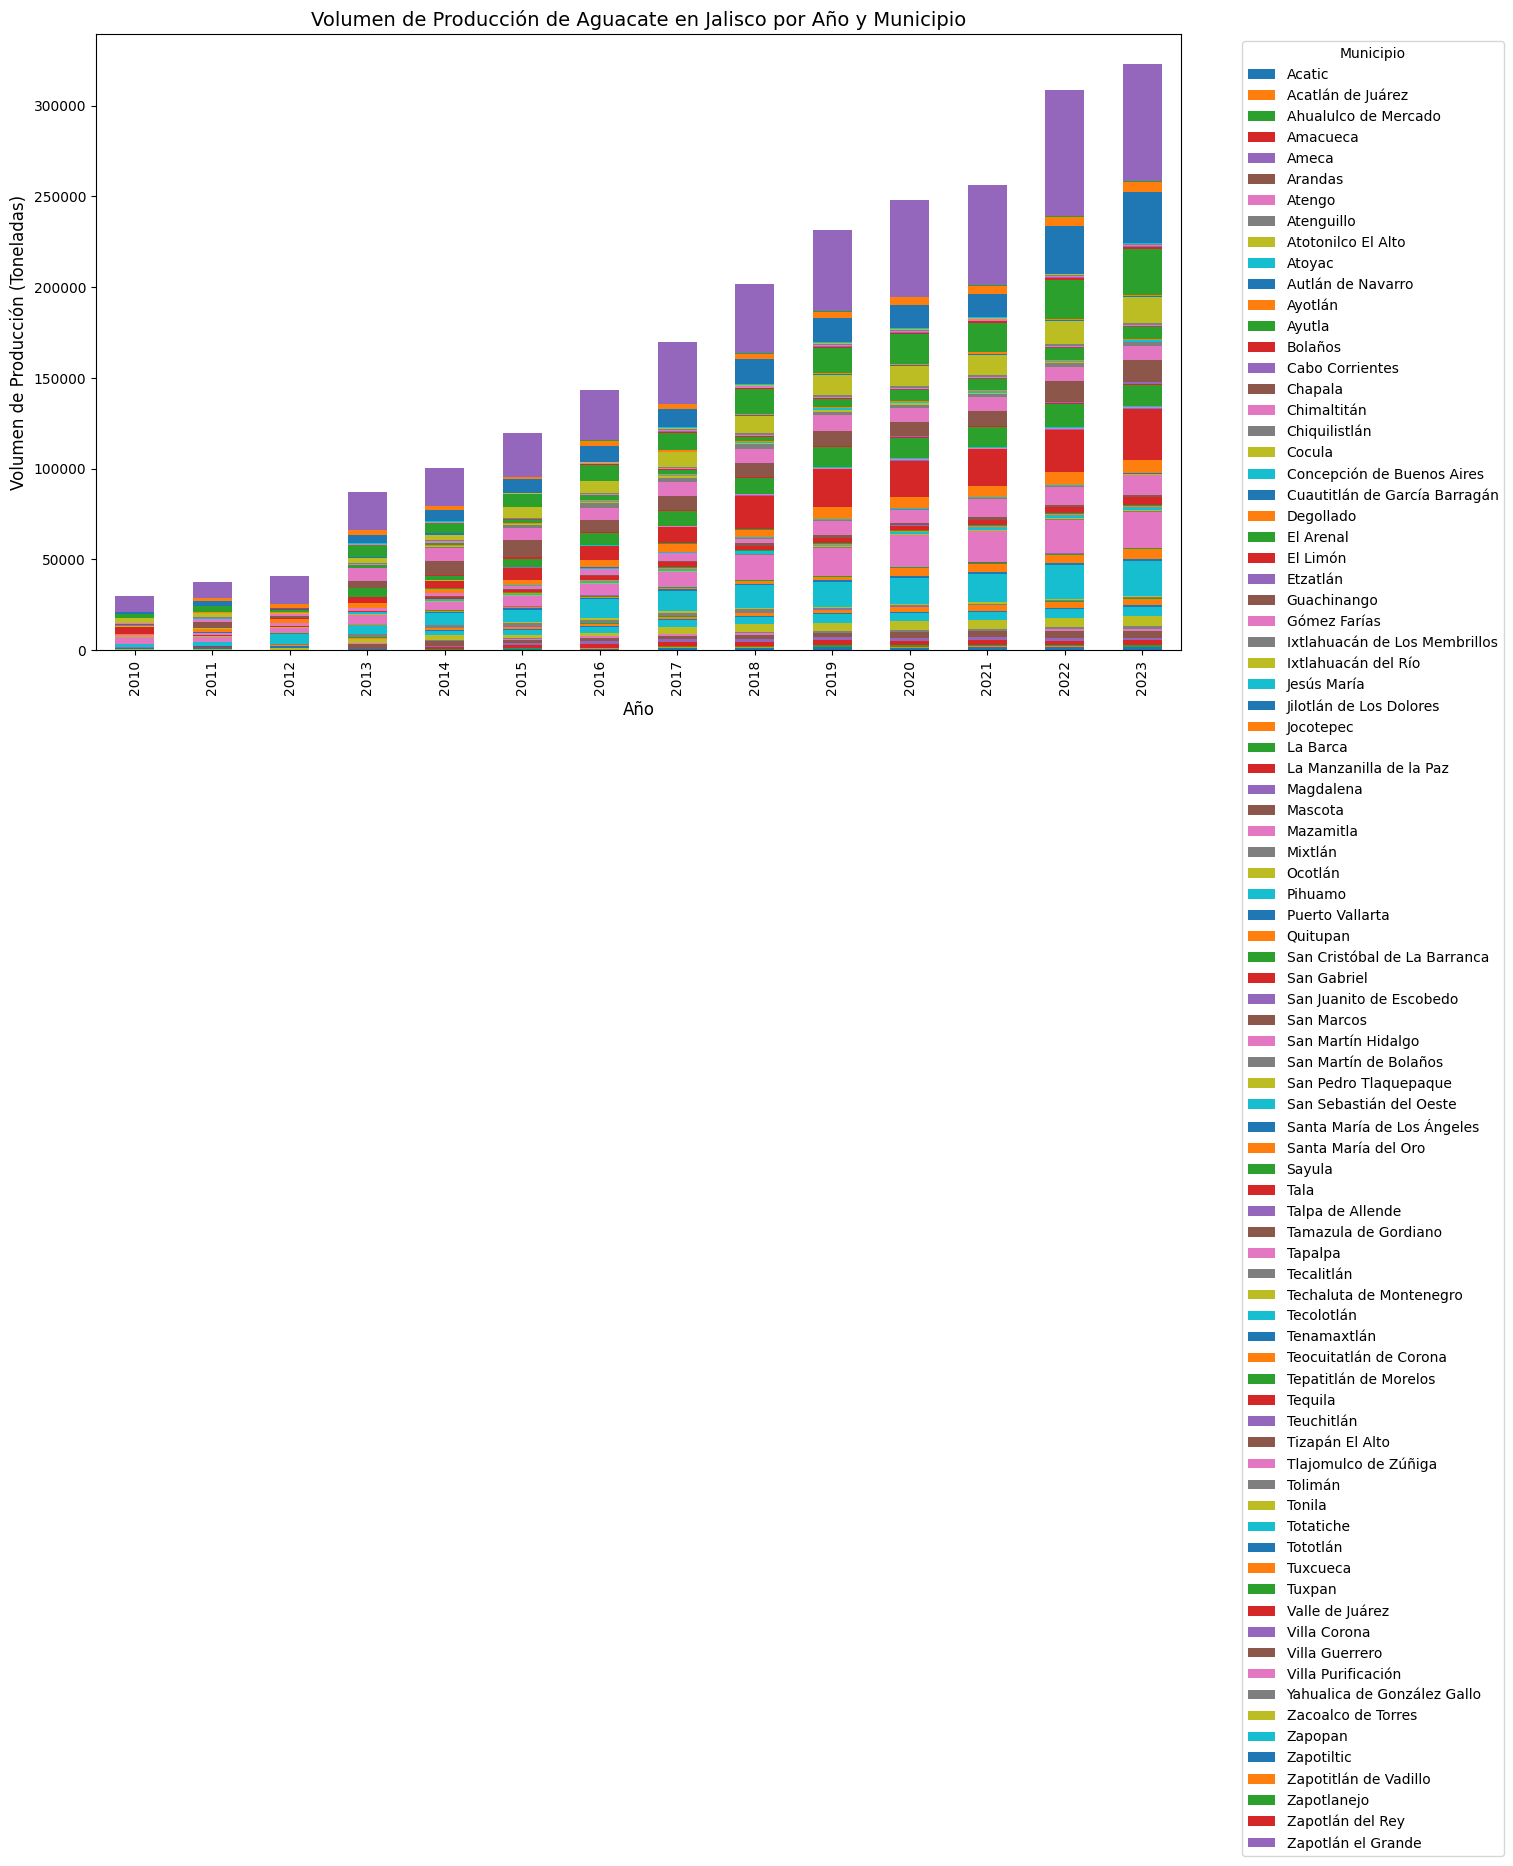

In [ ]:
# Convertir la columna 'Volumenproduccion' a numérico en caso de que haya valores no numéricos
df_aguacate_jalisco['Volumenproduccion'] = pd.to_numeric(df_aguacate_jalisco['Volumenproduccion'], errors='coerce')

# Agrupar los datos por 'Anio' y 'Nommunicipio' y sumar la columna 'Volumenproduccion'
df_grouped = df_aguacate_jalisco.groupby(['Anio', 'Nommunicipio'])['Volumenproduccion'].sum().reset_index()

# Crear un DataFrame pivotado para facilitar la creación de la gráfica de barras apiladas
df_pivot = df_grouped.pivot(index='Anio', columns='Nommunicipio', values='Volumenproduccion').fillna(0)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(14, 8))

# Crear la gráfica de barras apiladas
df_pivot.plot(kind='bar', stacked=True, ax=ax)

# Añadir títulos y etiquetas
ax.set_title('Volumen de Producción de Aguacate en Jalisco por Año y Municipio', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Volumen de Producción (Toneladas)', fontsize=12)

# Añadir una leyenda
ax.legend(title='Municipio', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño para evitar el corte de la leyenda
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [ ]:
df_aguacate_jalisco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 10214 to 475646
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Anio                1233 non-null   int64  
 1   Idestado            1233 non-null   int64  
 2   Nomestado           1233 non-null   object 
 3   Idddr               1233 non-null   int64  
 4   Nomddr              1233 non-null   object 
 5   Idcader             1233 non-null   int64  
 6   Nomcader            1233 non-null   object 
 7   Idmunicipio         1233 non-null   int64  
 8   Nommunicipio        1233 non-null   object 
 9   Idciclo             1233 non-null   int64  
 10  Nomcicloproductivo  1233 non-null   object 
 11  Idmodalidad         1233 non-null   int64  
 12  Nommodalidad        1233 non-null   object 
 13  Idunidadmedida      1233 non-null   int64  
 14  Nomunidad           1233 non-null   object 
 15  Idcultivo           1233 non-null   int64  
 16  Nomcu

In [ ]:
df_aguacate_jalisco.head()

,Anio,Idestado,Nomestado,Idddr,Nomddr,Idcader,Nomcader,Idmunicipio,Nommunicipio,Idciclo,...,Nomunidad,Idcultivo,Nomcultivo,Sembrada,Cosechada,Siniestrada,Volumenproduccion,Rendimiento,Preciomediorural,Valorproduccion
10214,2023,14,Jalisco,65,Zapopan,1,Palos Altos,45,Ixtlahuacán del Río,3,...,Tonelada,5060000,Aguacate,49.0,49.0,0.0,580.65,11.85,26817.23,15571424.60
10235,2023,14,Jalisco,65,Zapopan,2,Tesistán,71,San Cristóbal de La Barranca,3,...,Tonelada,5060000,Aguacate,4.0,4.0,0.0,50.08,12.52,18086.54,905773.92
10260,2023,14,Jalisco,65,Zapopan,2,Tesistán,120,Zapopan,3,...,Tonelada,5060000,Aguacate,25.0,25.0,0.0,368.75,14.75,17977.89,6629346.94
10275,2023,14,Jalisco,65,Zapopan,3,Tlajomulco,2,Acatlán de Juárez,3,...,Tonelada,5060000,Aguacate,30.0,30.0,0.0,429.00,14.30,17808.34,7639777.86
10314,2023,14,Jalisco,65,Zapopan,3,Tlajomulco,97,Tlajomulco de Zúñiga,3,...,Tonelada,5060000,Aguacate,27.0,27.0,0.0,372.60,13.80,17931.59,6681310.43


Aquí te explico qué significa cada campo de los datos obtenidos del INEGI:

Anio: El año en el que se recolectaron los datos. Representa el periodo temporal de la información (por ejemplo, 2023).

Idestado: Un identificador numérico para el estado en México al que pertenece el dato. Cada estado tiene un código único.

Nomestado: El nombre del estado correspondiente al identificador. En este caso, sería "Jalisco" u otro estado de México.

Idddr: Un identificador numérico para el "Distrito de Desarrollo Rural" (DDR). Este es un nivel administrativo agrícola que divide las regiones productivas dentro de un estado.

Nomddr: El nombre del Distrito de Desarrollo Rural (DDR), que organiza las actividades de desarrollo agrícola y productivo en una región del estado.

Idcader: Un identificador numérico para el "Centro de Apoyo al Desarrollo Rural" (CADER), que son oficinas locales que brindan asistencia técnica a los productores agrícolas.

Nomcader: El nombre del CADER correspondiente, que se refiere a un área específica dentro del distrito donde se presta apoyo a los agricultores.

Idmunicipio: Un identificador numérico para el municipio donde se encuentran los datos. Cada municipio dentro de un estado tiene su propio código único.

Nommunicipio: El nombre del municipio, que es una división administrativa dentro de un estado. Ejemplos: "Zapopan", "Tlajomulco".

Idciclo: Un identificador numérico que corresponde al ciclo productivo agrícola (por ejemplo, primavera-verano, otoño-invierno, etc.).

Nomcicloproductivo: El nombre del ciclo productivo, que indica la temporada de cultivo en la que se sembraron y cosecharon los productos (por ejemplo, Primavera-Verano).

Idmodalidad: Un identificador numérico para la modalidad de cultivo, que describe cómo se realizó el cultivo (por ejemplo, riego o temporal).

Nommodalidad: El nombre de la modalidad de cultivo, como “Riego” (irrigated farming) o “Temporal” (rain-fed farming).

Idunidadmedida: Un identificador numérico para la unidad de medida utilizada para cuantificar la producción (por ejemplo, tonelada, hectárea, etc.).

Nomunidad: El nombre de la unidad de medida que se está utilizando (por ejemplo, “Tonelada” o “Hectárea”).

Idcultivo: Un identificador numérico que corresponde al tipo de cultivo específico (por ejemplo, aguacate, maíz).

Nomcultivo: El nombre del cultivo específico al que se refieren los datos (por ejemplo, "Aguacate").

Sembrada: La superficie (en hectáreas) que fue sembrada con el cultivo en cuestión.

Cosechada: La superficie (en hectáreas) que fue efectivamente cosechada.

Siniestrada: La superficie (en hectáreas) que fue afectada por desastres naturales o eventos que causaron la pérdida de la cosecha.

Volumenproduccion: El volumen total de producción en la unidad de medida especificada (normalmente toneladas).

Rendimiento: La cantidad de producción por unidad de superficie (por ejemplo, toneladas por hectárea), que mide la eficiencia productiva.

Preciomediorural: El precio promedio rural al que se vendió el producto, expresado en pesos mexicanos por unidad (por ejemplo, por tonelada).

Valorproduccion: El valor total de la producción, calculado como el volumen de producción multiplicado por el precio promedio rural.


Voy a explicarte cada fila del head de la tabla que compartiste, fila por fila, para entender los datos:



```
Fila 1 (10214):
Anio: 2023 (año de la recolección de datos).
Idestado: 14 (identificador del estado "Jalisco").
Nomestado: Jalisco (nombre del estado).
Idddr: 65 (identificador del Distrito de Desarrollo Rural "Zapopan").
Nomddr: Zapopan (nombre del DDR).
Idcader: 1 (identificador del CADER "Palos Altos").
Nomcader: Palos Altos (nombre del CADER).
Idmunicipio: 45 (identificador del municipio "Ixtlahuacán del Río").
Nommunicipio: Ixtlahuacán del Río (nombre del municipio).
Idciclo: 3 (ciclo productivo, podría ser primavera-verano).
Nomunidad: Tonelada (unidad de medida de la producción).
Idcultivo: 5060000 (identificador del cultivo "Aguacate").
Nomcultivo: Aguacate (nombre del cultivo).
Sembrada: 49.0 hectáreas sembradas.
Cosechada: 49.0 hectáreas cosechadas.
Siniestrada: 0.0 hectáreas afectadas por siniestros.
Volumenproduccion: 580.65 toneladas producidas.
Rendimiento: 11.85 toneladas por hectárea (productividad).
Preciomediorural: $26,817.23 (precio promedio por tonelada).
Valorproduccion: $15,571,424.60 (valor total de la producción).
```



In [ ]:
valores_unicos = df_aguacate_jalisco['Nommunicipio'].unique()
print(valores_unicos)

['Ixtlahuacán del Río' 'San Cristóbal de La Barranca' 'Zapopan'
 'Acatlán de Juárez' 'Tlajomulco de Zúñiga' 'San Pedro Tlaquepaque'
 'Villa Corona' 'Zapotlanejo' 'Arandas' 'Jesús María'
 'Yahualica de González Gallo' 'Acatic' 'Tepatitlán de Morelos'
 'Magdalena' 'Tequila' 'Ahualulco de Mercado' 'San Juanito de Escobedo'
 'Etzatlán' 'San Marcos' 'El Arenal' 'Tala' 'Teuchitlán' 'Ameca' 'Cocula'
 'San Martín Hidalgo' 'Atenguillo' 'Guachinango' 'Mixtlán' 'Mascota'
 'San Sebastián del Oeste' 'Talpa de Allende'
 'Cuautitlán de García Barragán' 'Villa Purificación' 'Cabo Corrientes'
 'Puerto Vallarta' 'Ayutla' 'Atengo' 'Tecolotlán' 'Tenamaxtlán'
 'Autlán de Navarro' 'El Limón' 'La Barca' 'Ocotlán' 'Zapotlán del Rey'
 'Atotonilco El Alto' 'Tototlán' 'Chapala' 'Ixtlahuacán de Los Membrillos'
 'Jocotepec' 'Tizapán El Alto' 'Tuxcueca' 'Ayotlán' 'Degollado' 'Amacueca'
 'Atoyac' 'Techaluta de Montenegro' 'Teocuitatlán de Corona'
 'Zacoalco de Torres' 'Chiquilistlán' 'Tapalpa'
 'Concepción de Buenos

In [ ]:
# Descargar el archivo de coordenadas desde Google Drive
file_id = '1O-vVCogMRWOK1KXxqJGOhQz9VLP1ry5z'  # Reemplaza con el ID de tu archivo en Google Drive
output = 'LatLonMunJal.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Cargar el archivo de coordenadas
df_coordenadas = pd.read_csv('LatLonMunJal.csv')

# Cargar tu DataFrame df_aguacate_jalisco
# df_aguacate_jalisco = pd.read_csv('ruta_a_tu_archivo.csv')  # Reemplaza con la ruta a tu archivo

# Fusionar los DataFrames
df_aguacate_jalisco = df_aguacate_jalisco.merge(df_coordenadas, left_on='Nommunicipio', right_on='Municipio', how='left')

# Filtrar los datos para el año 2023
year = 2023
df_aguacate_jalisco_year = df_aguacate_jalisco[df_aguacate_jalisco['Anio'] == year]

# Agrupar los datos por 'Nommunicipio' y sumar el 'Volumenproduccion'
df_grouped = df_aguacate_jalisco_year.groupby('Nommunicipio').agg({
    'Volumenproduccion': 'sum',
    'Latitud': 'first',
    'Longitud': 'first'
}).reset_index()

# Crear el mapa de burbujas
fig = px.scatter_geo(df_grouped,
                     lat='Latitud',
                     lon='Longitud',
                     size='Volumenproduccion',
                     color='Volumenproduccion',
                     hover_name='Nommunicipio',
                     projection='mercator',
                     title=f'Mapa de Volumen de Producción de Aguacate en Jalisco por Municipio ({year})',
                     color_continuous_scale='RdBu')

# Ajustar el centro del mapa a Jalisco
fig.update_geos(fitbounds="locations", center=dict(lat=20.66682, lon=-103.39182))

# Mostrar el mapa
fig.show()

Downloading...
From: https://drive.google.com/uc?id=1O-vVCogMRWOK1KXxqJGOhQz9VLP1ry5z
To: /content/LatLonMunJal.csv
100%|██████████| 3.42k/3.42k [00:00<00:00, 8.20MB/s]


In [ ]:
# Descargar el archivo de coordenadas desde Google Drive
file_id = '1O-vVCogMRWOK1KXxqJGOhQz9VLP1ry5z'  # Reemplaza con el ID de tu archivo en Google Drive
output = 'LatLonMunJal.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Cargar el archivo de coordenadas
df_coordenadas = pd.read_csv('LatLonMunJal.csv')

# Verificar que las columnas 'Latitud' y 'Longitud' existen en df_coordenadas
print(df_coordenadas.head())

# Cargar tu DataFrame df_aguacate_jalisco
# df_aguacate_jalisco = pd.read_csv('ruta_a_tu_archivo.csv')  # Reemplaza con la ruta a tu archivo

# Fusionar los DataFrames
df_aguacate_jalisco = df_aguacate_jalisco.merge(df_coordenadas, left_on='Nommunicipio', right_on='Municipio', how='left')

# Verificar que las columnas 'Latitud' y 'Longitud' existen en df_aguacate_jalisco
print(df_aguacate_jalisco.head())

# Filtrar los datos para el año 2023
year = 2023
df_aguacate_jalisco_year = df_aguacate_jalisco[df_aguacate_jalisco['Anio'] == year]

# Agrupar los datos por 'Nommunicipio' y sumar el 'Volumenproduccion'
df_grouped = df_aguacate_jalisco_year.groupby('Nommunicipio').agg({
    'Volumenproduccion': 'sum',
    'Latitud': 'first',
    'Longitud': 'first'
}).reset_index()

# Crear el mapa de burbujas
fig = px.scatter_geo(df_grouped,
                     lat='Latitud',
                     lon='Longitud',
                     size='Volumenproduccion',
                     color='Volumenproduccion',
                     hover_name='Nommunicipio',
                     projection='mercator',
                     title=f'Mapa de Volumen de Producción de Aguacate en Jalisco por Municipio ({year})',
                     color_continuous_scale='RdBu')

# Ajustar el centro del mapa a Jalisco
fig.update_geos(fitbounds="locations", center=dict(lat=20.66682, lon=-103.39182))

# Limitar el mapa a Jalisco
fig.update_geos(
    lataxis_range=[19.0, 22.0],  # Rango de latitud para Jalisco
    lonaxis_range=[-105.0, -102.0]  # Rango de longitud para Jalisco
)

# Mostrar el mapa
fig.show()

Downloading...
From: https://drive.google.com/uc?id=1O-vVCogMRWOK1KXxqJGOhQz9VLP1ry5z
To: /content/LatLonMunJal.csv
100%|██████████| 3.42k/3.42k [00:00<00:00, 3.19MB/s]

                      Municipio  Latitud    Longitud
0           Ixtlahuacán del Río  210,231  -1,032,941
1  San Cristóbal de La Barranca  210,865  -1,034,831
2                       Zapopan  207,500  -1,034,000
3             Acatlán de Juárez  202,083  -1,036,153
4          Tlajomulco de Zúñiga  204,715  -1,034,465
   Anio  Idestado Nomestado  Idddr   Nomddr  Idcader     Nomcader  \
0  2023        14   Jalisco     65  Zapopan        1  Palos Altos   
1  2023        14   Jalisco     65  Zapopan        2     Tesistán   
2  2023        14   Jalisco     65  Zapopan        2     Tesistán   
3  2023        14   Jalisco     65  Zapopan        3   Tlajomulco   
4  2023        14   Jalisco     65  Zapopan        3   Tlajomulco   

   Idmunicipio                  Nommunicipio  Idciclo  ... Valorproduccion  \
0           45           Ixtlahuacán del Río        3  ...     15571424.60   
1           71  San Cristóbal de La Barranca        3  ...       905773.92   
2          120                   

In [ ]:
# Descargar el archivo de coordenadas desde Google Drive
file_id = '1O-vVCogMRWOK1KXxqJGOhQz9VLP1ry5z'  # Reemplaza con el ID de tu archivo en Google Drive
output = 'LatLonMunJal.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Cargar el archivo de coordenadas
df_coordenadas = pd.read_csv('LatLonMunJal.csv')

# Cargar tu DataFrame df_aguacate_jalisco
# df_aguacate_jalisco = pd.read_csv('ruta_a_tu_archivo.csv')  # Reemplaza con la ruta a tu archivo

# Fusionar los DataFrames
df_aguacate_jalisco = df_aguacate_jalisco.merge(df_coordenadas, left_on='Nommunicipio', right_on='Municipio', how='left')

# Filtrar los datos para el año 2023
year = 2023
df_aguacate_jalisco_year = df_aguacate_jalisco[df_aguacate_jalisco['Anio'] == year]

# Agrupar los datos por 'Nommunicipio' y sumar el 'Volumenproduccion'
df_grouped = df_aguacate_jalisco_year.groupby('Nommunicipio').agg({
    'Volumenproduccion': 'sum',
    'Latitud': 'first',
    'Longitud': 'first'
}).reset_index()

# Cargar el archivo GeoJSON de los límites de Jalisco
with open('mexicoHigh.json', 'r') as f:
    geojson = json.load(f)

# Crear el mapa de burbujas
fig = px.scatter_geo(df_grouped,
                     lat='Latitud',
                     lon='Longitud',
                     size='Volumenproduccion',
                     color='Volumenproduccion',
                     hover_name='Nommunicipio',
                     projection='mercator',
                     title=f'Mapa de Volumen de Producción de Aguacate en Jalisco por Municipio ({year})',
                     color_continuous_scale='RdBu')

# Ajustar el centro del mapa a Jalisco
fig.update_geos(fitbounds="locations", center=dict(lat=20.66682, lon=-103.39182))

# Limitar el mapa a Jalisco
fig.update_geos(
    lataxis_range=[19.0, 22.0],  # Rango de latitud para Jalisco
    lonaxis_range=[-105.0, -102.0]  # Rango de longitud para Jalisco
)

# Dibujar los límites del estado de Jalisco
fig.update_geos(
    visible=False, resolution=50,
    showcountries=True, countrycolor="RebeccaPurple",
    showsubunits=True, subunitcolor="Blue"
)

# Mostrar el mapa
fig.show()

Downloading...
From: https://drive.google.com/uc?id=1O-vVCogMRWOK1KXxqJGOhQz9VLP1ry5z
To: /content/LatLonMunJal.csv
100%|██████████| 3.42k/3.42k [00:00<00:00, 8.41MB/s]


MergeError: Passing 'suffixes' which cause duplicate columns {'Municipio_x', 'Longitud_x', 'Latitud_x'} is not allowed.

In [ ]:
# Calcular la rentabilidad por hectárea
df_aguacate_jalisco['Rentabilidad_por_hectarea'] = (df_aguacate_jalisco['Cosechada'] * df_aguacate_jalisco['Rendimiento']) * df_aguacate_jalisco['Preciomediorural']

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_aguacate_jalisco['Rentabilidad_por_hectarea'])
plt.title('Rentabilidad por Hectárea de la Cosecha de Aguacate en Jalisco en 2023')
plt.xlabel('Rentabilidad por Hectárea')
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>